In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 60, 10).reshape(-1, 1)
S = 5 * t + 0.5 * 4 * t**2

X = np.concatenate((t, t**2), axis=1)
y=S.reshape(-1,1)
print(X)
print(y)

[[   0.            0.        ]
 [   6.66666667   44.44444444]
 [  13.33333333  177.77777778]
 [  20.          400.        ]
 [  26.66666667  711.11111111]
 [  33.33333333 1111.11111111]
 [  40.         1600.        ]
 [  46.66666667 2177.77777778]
 [  53.33333333 2844.44444444]
 [  60.         3600.        ]]
[[   0.        ]
 [ 122.22222222]
 [ 422.22222222]
 [ 900.        ]
 [1555.55555556]
 [2388.88888889]
 [3400.        ]
 [4588.88888889]
 [5955.55555556]
 [7500.        ]]


In [ ]:
LR=0.09
INIT=-10
ITER=100

In [ ]:
def feature_scaling(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    X_scale=(X-mean)/std
    return X_scale , mean,std

In [ ]:
X_scaled, mean_X, std_X = feature_scaling(X)
y_scaled, mean_y, std_y = feature_scaling(y)
print(X_scaled)
print(y_scaled)
X_scaled = np.concatenate((np.ones((X_scaled.shape[0], 1)), X_scaled), axis=1)
print(X_scaled)

[[-1.5666989  -1.06135866]
 [-1.21854359 -1.02411801]
 [-0.87038828 -0.91239604]
 [-0.52223297 -0.72619277]
 [-0.17407766 -0.46550819]
 [ 0.17407766 -0.13034229]
 [ 0.52223297  0.27930491]
 [ 0.87038828  0.76343342]
 [ 1.21854359  1.32204325]
 [ 1.5666989   1.95513438]]
[[-1.0823455 ]
 [-1.03304612]
 [-0.91203855]
 [-0.71932279]
 [-0.45489883]
 [-0.11876669]
 [ 0.28907364]
 [ 0.76862217]
 [ 1.31987888]
 [ 1.94284379]]
[[ 1.         -1.5666989  -1.06135866]
 [ 1.         -1.21854359 -1.02411801]
 [ 1.         -0.87038828 -0.91239604]
 [ 1.         -0.52223297 -0.72619277]
 [ 1.         -0.17407766 -0.46550819]
 [ 1.          0.17407766 -0.13034229]
 [ 1.          0.52223297  0.27930491]
 [ 1.          0.87038828  0.76343342]
 [ 1.          1.21854359  1.32204325]
 [ 1.          1.5666989   1.95513438]]


In [ ]:
def poly_reg_grad_des(X, y, learn_r=0.09, num_iter=100):
    m, n = X.shape
    theta = np.zeros((n, 1)) - INIT
    cost_history = []

    for i in range(num_iter):
        pred = X.dot(theta)
        error = pred - y
        grad=(1/m) * X.T.dot(error)
        theta-=learn_r*grad
        cost=np.mean(error **2)
        cost_history.append(cost)



    return theta, cost_history
theta, cost_history = poly_reg_grad_des(X_scaled, y_scaled)
print(theta)
print(cost_history)


y_pred=X_scaled.dot(theta)
print("y_pred",y_pred,"y",y_scaled)

[[0.00080194]
 [0.36871275]
 [0.63267354]]
[np.float64(454.2299180034121), np.float64(322.95390545355184), np.float64(231.37785736447722), np.float64(167.158916453368), np.float64(121.85335003079578), np.float64(89.67382620305268), np.float64(66.64469466557257), np.float64(50.02746952235839), np.float64(37.92980784505619), np.float64(29.039149047927157), np.float64(22.441084138935167), np.float64(17.495347112657235), np.float64(13.751020336500687), np.float64(10.88844877319158), np.float64(8.679364086409674), np.float64(6.959439247184062), np.float64(5.609340962716674), np.float64(4.541601695579637), np.float64(3.6914855499590997), np.float64(3.0106019691437047), np.float64(2.4624155934978624), np.float64(2.0190691932282046), np.float64(1.659119641432462), np.float64(1.365911803184224), np.float64(1.1264005715249916), np.float64(0.9302897049660764), np.float64(0.7693961913033761), np.float64(0.6371764108485513), np.float64(0.5283693656504962), np.float64(0.4387253806165976), np.float64

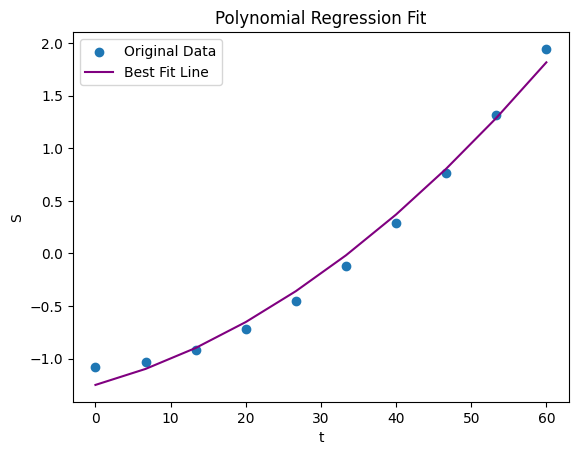

In [ ]:
plt.scatter(t, y_scaled, label='Original Data')
plt.plot(t, y_pred, color='purple', label='Best Fit Line')
plt.xlabel('t')
plt.ylabel('S')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

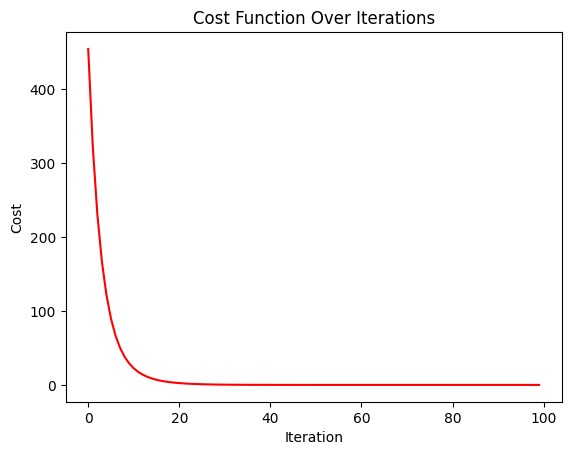

In [ ]:
plt.plot(range(len(cost_history)), cost_history, color='red')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y )
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print(theta)

Coefficients: [[5. 2.]]
Intercept: [9.09494702e-13]
[[0.00080194]
 [0.36871275]
 [0.63267354]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

t = np.linspace(0, 60, 10).reshape(-1, 1)
S = 5 * t + 0.5 * 4 * t**2

X = np.concatenate((t, t**2), axis=1)
y = S.reshape(-1,1)
print(X)
print(y)

def feature_scaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

X_scaled, mean_X, std_X = feature_scaling(X)
y_scaled, mean_y, std_y = feature_scaling(y)


X_scaled = np.concatenate((np.ones((X_scaled.shape[0], 1)), X_scaled), axis=1)


LR = 0.05
INIT = -10
ITER = 2000

def poly_reg_grad_des(X, y, learn_r=LR, num_iter=ITER):
    m, n = X.shape
    theta = np.zeros((n, 1)) - INIT
    cost_history = []

    for i in range(num_iter):
        pred = X.dot(theta)
        error = pred - y
        grad = (1/m) * X.T.dot(error)
        theta -= learn_r * grad
        cost = np.mean(error ** 2)
        cost_history.append(cost)

    return theta, cost_history

theta_scaled, cost_history = poly_reg_grad_des(X_scaled, y_scaled)

# --- Rescale theta back to original space ---
theta_1_orig = theta_scaled[1][0] * (std_y[0] / std_X[0])  # coefficient of t
theta_2_orig = theta_scaled[2][0] * (std_y[0] / std_X[1])  # coefficient of t^2

intercept_orig = mean_y[0] + std_y[0] * theta_scaled[0][0] \
                 - theta_1_orig * mean_X[0] - theta_2_orig * mean_X[1]

theta_orig = np.array([intercept_orig, theta_1_orig, theta_2_orig])

print("\n--- Theta in Original Space ---")
print("Intercept:", intercept_orig)
print("t Coefficient:", theta_1_orig)
print("t^2 Coefficient:", theta_2_orig)


y_pred = theta_orig[0] + theta_orig[1] * t + theta_orig[2] * t**2
print("\nPredicted y:\n", y_pred)
print("\nActual y:\n", y)
print("\n[Gradient Descent]")
print("Intercept:", theta_orig[0])
print("t Coefficient:", theta_orig[1])
print("t^2 Coefficient:", theta_orig[2])


reg = LinearRegression().fit(X,y )
intercept_sklearn = reg.intercept_[0]
theta1_sklearn = reg.coef_[0][0]
theta2_sklearn = reg.coef_[0][1]

print("\n[Sklearn LinearRegression]")
print("Intercept:", intercept_sklearn)
print("t Coefficient:", theta1_sklearn)
print("t^2 Coefficient:", theta2_sklearn)

[[   0.            0.        ]
 [   6.66666667   44.44444444]
 [  13.33333333  177.77777778]
 [  20.          400.        ]
 [  26.66666667  711.11111111]
 [  33.33333333 1111.11111111]
 [  40.         1600.        ]
 [  46.66666667 2177.77777778]
 [  53.33333333 2844.44444444]
 [  60.         3600.        ]]
[[   0.        ]
 [ 122.22222222]
 [ 422.22222222]
 [ 900.        ]
 [1555.55555556]
 [2388.88888889]
 [3400.        ]
 [4588.88888889]
 [5955.55555556]
 [7500.        ]]

--- Theta in Original Space ---
Intercept: -13.828359468080635
t Coefficient: 6.42906197417381
t^2 Coefficient: 1.9770709212443682

Predicted y:
 [[ -13.82835947]
 [ 116.90187242]
 [ 423.37174174]
 [ 905.58124851]
 [1563.53039273]
 [2397.21917439]
 [3406.64759349]
 [4591.81565004]
 [5952.72334403]
 [7489.37067546]]

Actual y:
 [[   0.        ]
 [ 122.22222222]
 [ 422.22222222]
 [ 900.        ]
 [1555.55555556]
 [2388.88888889]
 [3400.        ]
 [4588.88888889]
 [5955.55555556]
 [7500.        ]]

[Gradient Descen